In [102]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT,COMPLEX_MOVEMENT
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt
import os 
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [103]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, COMPLEX_MOVEMENT)
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [104]:
env.action_space

Discrete(12)

In [105]:
state = env.reset()

In [106]:
state,reward,done,info = env.step([5])
print(state)

[[[[  0   0 140 140]
   [  0   0 140 140]
   [  0   0 140 140]
   ...
   [  0   0 140 140]
   [  0   0 140 140]
   [  0   0 140 140]]

  [[  0   0 140 140]
   [  0   0 140 140]
   [  0   0 140 140]
   ...
   [  0   0 140 140]
   [  0   0 140 140]
   [  0   0 140 140]]

  [[  0   0 140 140]
   [  0   0 140 140]
   [  0   0 140 140]
   ...
   [  0   0 140 140]
   [  0   0 140 140]
   [  0   0 140 140]]

  ...

  [[  0   0 214 214]
   [  0   0 124 124]
   [  0   0 124 124]
   ...
   [  0   0 124 124]
   [  0   0 124 124]
   [  0   0   0   0]]

  [[  0   0 214 214]
   [  0   0 124 124]
   [  0   0 124 124]
   ...
   [  0   0 124 124]
   [  0   0   0   0]
   [  0   0   0   0]]

  [[  0   0 124 124]
   [  0   0   0   0]
   [  0   0   0   0]
   ...
   [  0   0   0   0]
   [  0   0   0   0]
   [  0   0 124 124]]]]


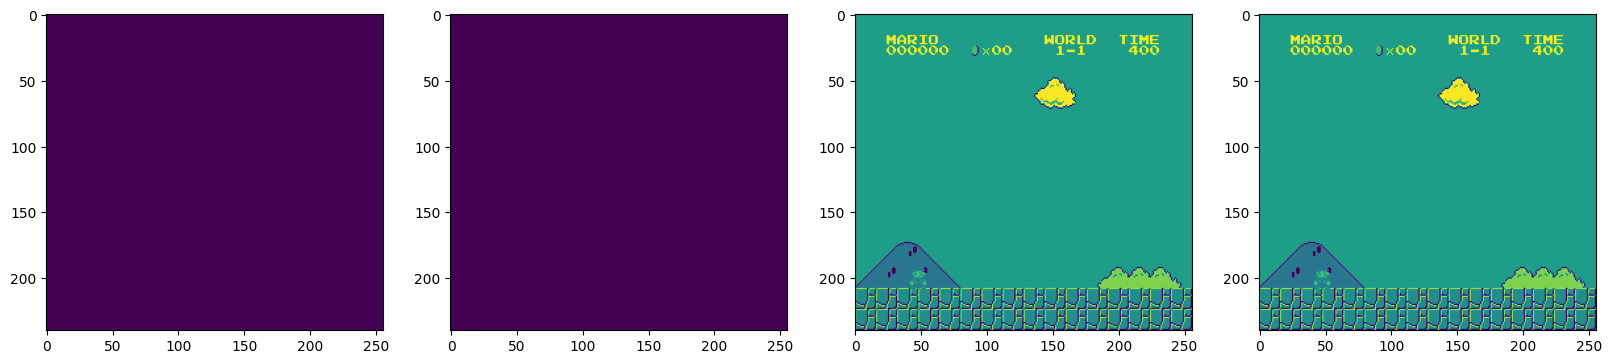

In [107]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [108]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [109]:
CHECKPOINT = 'D:/ML_Projects/Reinforcement Learning/Mario/train'
log_dir = 'D:/ML_Projects/Reinforcement Learning/Mario/logs'

In [110]:
callback = TrainAndLoggingCallback(check_freq=10000,save_path=CHECKPOINT)

In [111]:
n_envs = env.num_envs
print(f"Number of environments: {n_envs}")

# Adjust n_steps and batch_size
n_steps = 1024
batch_size = 256

# Calculate buffer_size
buffer_size = n_steps * n_envs
print(f"Buffer size: {buffer_size}")
print(f"Batch size: {batch_size}")
print(f"Buffer size % Batch size: {buffer_size % batch_size}")

Number of environments: 1
Buffer size: 1024
Batch size: 256
Buffer size % Batch size: 0


In [112]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=log_dir, learning_rate=0.000001, 
            n_steps=1024,batch_size=256) 
model

Using cuda device
Wrapping the env in a VecTransposeImage.


In [113]:
print(env.action_space)
print(state.shape)

Discrete(12)
(1, 240, 256, 4)


In [114]:
model.learn(total_timesteps=100000,callback=callback)

Logging to D:/ML_Projects/Reinforcement Learning/Mario/logs\PPO_1
-----------------------------
| time/              |      |
|    fps             | 237  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 1024 |
-----------------------------


d:\ML_Projects\Reinforcement Learning\Mario\mario\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


-------------------------------------------
| time/                   |               |
|    fps                  | 127           |
|    iterations           | 2             |
|    time_elapsed         | 16            |
|    total_timesteps      | 2048          |
| train/                  |               |
|    approx_kl            | 0.00018850155 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.48         |
|    explained_variance   | 0.00838       |
|    learning_rate        | 1e-06         |
|    loss                 | 26.6          |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000266     |
|    value_loss           | 69            |
-------------------------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 113            |
|    iterations           | 3              |
|    time_elapsed         | 

In [115]:
model.save("2nd_Test")

In [123]:
model = model.load('D:/ML_Projects/Reinforcement Learning/Mario/train/best_model_100000.zip')

d:\ML_Projects\Reinforcement Learning\Mario\mario\Lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  except (RuntimeError, TypeError, AttributeError) as e:
d:\ML_Projects\Reinforcement Learning\Mario\mario\Lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
  except (RuntimeError, TypeError, AttributeError) as e:


AssertionError: 

In [117]:
state = env.reset()

In [118]:
state = env.reset()
while True: 
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

KeyboardInterrupt: 